# **Hypothesis Testing on Cars Dataset**
##  Awais Manzoor

# **_Import Libraries_**

In [8]:
import pandas as pd
import numpy as np
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt



# **_Load Dataset_**

In [7]:
cars = pd.read_excel('CARS.xlsx')
cars.head(10)

,Make,Model,Type,Origin,DriveTrain,MSRP,Invoice,EngineSize,Cylinders,Horsepower,MPG_City,MPG_Highway,Weight,Wheelbase,Length
0,Acura,MDX,SUV,Asia,All,36945,33337,3.5,6.0,265,17,23,4451,106,189
1,Acura,RSX Type S 2dr,Sedan,Asia,Front,23820,21761,2.0,4.0,200,24,31,2778,101,172
2,Acura,TSX 4dr,Sedan,Asia,Front,26990,24647,2.4,4.0,200,22,29,3230,105,183
3,Acura,TL 4dr,Sedan,Asia,Front,33195,30299,3.2,6.0,270,20,28,3575,108,186
4,Acura,3.5 RL 4dr,Sedan,Asia,Front,43755,39014,3.5,6.0,225,18,24,3880,115,197
5,Acura,3.5 RL w/Navigation 4dr,Sedan,Asia,Front,46100,41100,3.5,6.0,225,18,24,3893,115,197
6,Acura,NSX coupe 2dr manual S,Sports,Asia,Rear,89765,79978,3.2,6.0,290,17,24,3153,100,174
7,Audi,A4 1.8T 4dr,Sedan,Europe,Front,25940,23508,1.8,4.0,170,22,31,3252,104,179
8,Audi,A41.8T convertible 2dr,Sedan,Europe,Front,35940,32506,1.8,4.0,170,23,30,3638,105,180
9,Audi,A4 3.0 4dr,Sedan,Europe,Front,31840,28846,3.0,6.0,220,20,28,3462,104,179


In [10]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 428 entries, 0 to 427
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Make         428 non-null    object 
 1   Model        428 non-null    object 
 2   Type         428 non-null    object 
 3   Origin       428 non-null    object 
 4   DriveTrain   428 non-null    object 
 5   MSRP         428 non-null    int64  
 6   Invoice      428 non-null    int64  
 7   EngineSize   428 non-null    float64
 8   Cylinders    426 non-null    float64
 9   Horsepower   428 non-null    int64  
 10  MPG_City     428 non-null    int64  
 11  MPG_Highway  428 non-null    int64  
 12  Weight       428 non-null    int64  
 13  Wheelbase    428 non-null    int64  
 14  Length       428 non-null    int64  
dtypes: float64(2), int64(8), object(5)
memory usage: 50.3+ KB


- **load the dataset and check columns, data types, and missing values.**

# **_Data Cleaning_**

In [11]:
cars.isnull().sum()

Make           0
Model          0
Type           0
Origin         0
DriveTrain     0
MSRP           0
Invoice        0
EngineSize     0
Cylinders      2
Horsepower     0
MPG_City       0
MPG_Highway    0
Weight         0
Wheelbase      0
Length         0
dtype: int64

In [13]:
# Handle missing values in Cylinders
cars['Cylinders'].fillna(cars['Cylinders'].median(), inplace=True)


C:\Users\hp\AppData\Local\Temp\ipykernel_17696\3393017961.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  cars['Cylinders'].fillna(cars['Cylinders'].median(), inplace=True)


In [14]:
print(cars.isnull().sum())

Make           0
Model          0
Type           0
Origin         0
DriveTrain     0
MSRP           0
Invoice        0
EngineSize     0
Cylinders      0
Horsepower     0
MPG_City       0
MPG_Highway    0
Weight         0
Wheelbase      0
Length         0
dtype: int64


- **We replace missing values (only 2 in Cylinders) with the median — suitable for numerical data.**

# **_Descriptive Statistics_**

In [15]:
cars.describe()

,MSRP,Invoice,EngineSize,Cylinders,Horsepower,MPG_City,MPG_Highway,Weight,Wheelbase,Length
count,428.000000,428.000000,428.000000,428.000000,428.000000,428.000000,428.000000,428.000000,428.000000,428.000000
mean,32774.855140,30014.700935,3.196729,5.808411,215.885514,20.060748,26.843458,3577.953271,108.154206,186.362150
std,19431.716674,17642.117750,1.108595,1.554844,71.836032,5.238218,5.741201,758.983215,8.311813,14.357991
min,10280.000000,9875.000000,1.300000,3.000000,73.000000,10.000000,12.000000,1850.000000,89.000000,143.000000
25%,20334.250000,18866.000000,2.375000,4.000000,165.000000,17.000000,24.000000,3104.000000,103.000000,178.000000
50%,27635.000000,25294.500000,3.000000,6.000000,210.000000,19.000000,26.000000,3474.500000,107.000000,187.000000
75%,39205.000000,35710.250000,3.900000,6.000000,255.000000,21.250000,29.000000,3977.750000,112.000000,194.000000
max,192465.000000,173560.000000,8.300000,12.000000,500.000000,60.000000,66.000000,7190.000000,144.000000,238.000000


- This gives the mean, median, min, max, std for numeric columns like MSRP, Horsepower, EngineSize, etc.
- It helps understand data distribution before testing hypotheses.

# **_Normality_**
- before Parametric Tests

## Histogram & Q–Q Plot

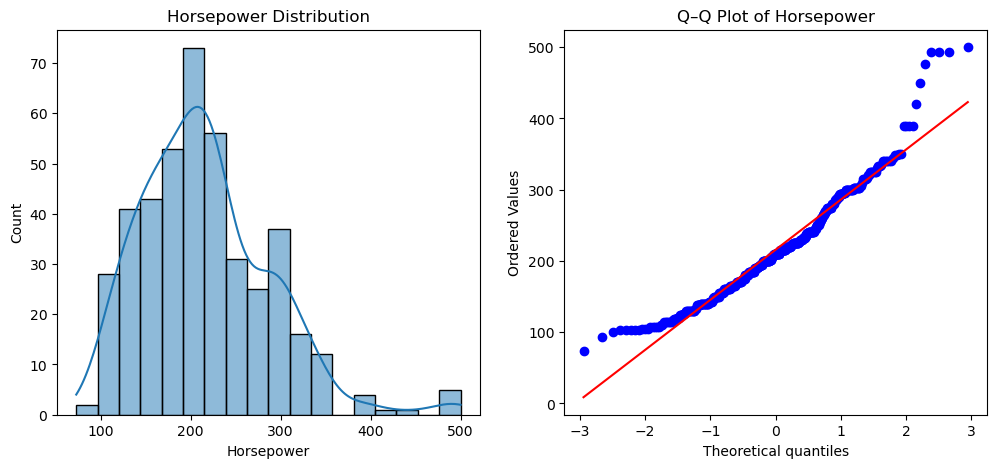

In [17]:
import scipy.stats as stats

plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.histplot(cars['Horsepower'], kde=True)
plt.title("Horsepower Distribution")

plt.subplot(1,2,2)
stats.probplot(cars['Horsepower'], dist="norm", plot=plt)
plt.title("Q–Q Plot of Horsepower")
plt.show()


# **_Parametric Tests_**
- **when data is normal**

# Hypothesis Tests Overview

| **Test**               | **Use Case**                 | **Hypothesis Example**         | **Decision Rule**             |
|--------------------------|------------------------------|--------------------------------|-------------------------------|
| **One-Sample t-test**    | Compare sample mean to value | H₀: Horsepower = 200           | Reject / Fail based on p < 0.05 |
| **Independent t-test**   | Compare two independent groups | H₀: Mean MSRP (USA) = Mean MSRP (Europe) | Based on p-value significance |
| **ANOVA**                | Compare 3+ groups            | H₀: Mean Horsepower (Sedan = SUV = Sports) | p < 0.05 → at least one mean differs |
| **Mann–Whitney U**       | Non-parametric 2-group comparison | H₀: Distributions equal (USA vs Europe) | Based on p-value significance |
| **Kruskal–Wallis**       | Non-parametric ANOVA (3+ groups) | H₀: All medians equal (car types) | p < 0.05 → at least one differs |
| **Chi-Square**           | Relationship between categories | H₀: Origin and DriveTrain independent | p < 0.05 → variables related |


# **_One-Sample t-test_**
-  **checking if there is a significant difference between a sample and
 hypothesized population means.**

In [26]:
from scipy.stats import ttest_1samp

In [18]:
t_stat, p_val = stats.ttest_1samp(cars['Horsepower'], 200)
print("t-value:", t_stat)
print("p-value:", p_val)

if p_val < 0.05:
    print("Reject H₀ → Mean horsepower is significantly different from 200.")
else:
    print("Fail to reject H₀ → Mean horsepower ≈ 200.")


t-value: 4.574891766789726
p-value: 6.253344784284048e-06
Reject H₀ → Mean horsepower is significantly different from 200.


# _**Independent Two-Sample t-test**_
- **A two-sample t-test is used for comparing the significant difference between two
 independent groups. This test is also known as an independent samples t-test.**

In [25]:
from scipy.stats import ttest_ind

In [20]:
usa = cars[cars['Origin'] == 'USA']['MSRP']
europe = cars[cars['Origin'] == 'Europe']['MSRP']

t_stat, p_val = stats.ttest_ind(usa, europe)
print("t-value:", t_stat)
print("p-value:", p_val)

if p_val < 0.05:
    print("Reject H₀ → Mean MSRP differs between USA and Europe cars.")
else:
    print("Fail to reject H₀ → No significant difference in MSRP.")


t-value: -8.5368542432442
p-value: 1.0436671157614213e-15
Reject H₀ → Mean MSRP differs between USA and Europe cars.


# _**ANOVA (One-Way)**_
- **With the one-way ANOVA method, we compare multiple groups based on only
 one independent variable**

In [22]:
from scipy.stats import f_oneway

In [24]:
stat, p=f_oneway(cars["Invoice"],cars["MSRP"],cars["Horsepower"])
print("p_value:",p)
print("ANOVA:",stat)
if p < 0.05:
    print("Reject H₀ → At least one group mean is different.")
else:
    print("Fail to reject H₀ → All group means are equal.")


p_value: 2.7292133264922565e-186
ANOVA: 607.5629296531739
Reject H₀ → At least one group mean is different.


# _**Non-Parametric Tests**_
-  if data not normal

# _**Mann–Whitney U Test**_

- Alternative to independent t-test (used when data is not normal).

In [27]:
stat, p_val = stats.mannwhitneyu(usa, europe)
print("U-statistic:", stat)
print("p-value:", p_val)
if p_val < 0.05:
    print("Reject H₀ → Median MSRP differs between USA and Europe cars.")
else:
    print("Fail to reject H₀ → No significant difference in median MSRP.")

U-statistic: 3489.5
p-value: 3.749254035965752e-18
Reject H₀ → Median MSRP differs between USA and Europe cars.


# _**Kruskal–Wallis Test**_

- Non-parametric version of ANOVA.

In [29]:
groups = [grp['MSRP'].values for name, grp in cars.groupby('Type')]
stat, p_val = stats.kruskal(*groups)
print("Statistic:", stat)
print("p-value:", p_val)
if p_val < 0.05:
    print("Reject H₀ → At least one car type has a different median MSRP.")
else:
    print("Fail to reject H₀ → Median MSRP is similar across car types.")


Statistic: 49.18863253683512
p-value: 2.030713990529349e-09
Reject H₀ → At least one car type has a different median MSRP.


# _**Chi-Square Test of Independence**_


In [32]:
from scipy.stats import chi2_contingency


In [33]:

contingency_table = pd.crosstab(cars['Origin'], cars['DriveTrain'])
chi2, p, dof, expected = chi2_contingency(contingency_table)
print("Chi2:", chi2)
print("p-value:", p)

if p < 0.05:
    print("Reject H₀ → Origin and DriveTrain are related.")
else:
    print("Fail to reject H₀ → No relation between Origin and DriveTrain.")


Chi2: 40.17843276388697
p-value: 3.975800851556937e-08
Reject H₀ → Origin and DriveTrain are related.


# _**Visualizing**_

# _**Boxplot of MSRP by Origin**_

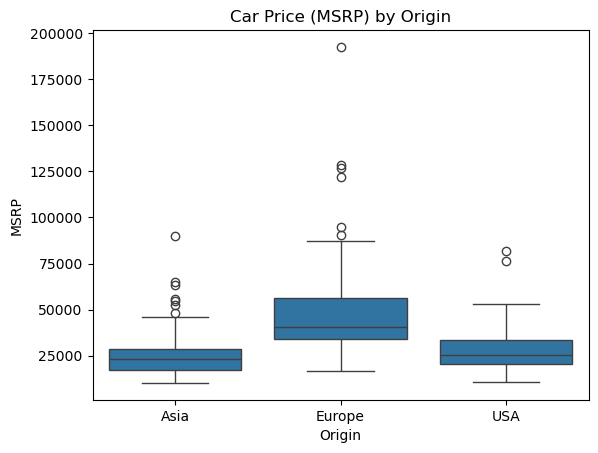

In [35]:
sns.boxplot(x='Origin', y='MSRP', data=cars)
plt.title("Car Price (MSRP) by Origin")
plt.show()


# _**Pairplot**_

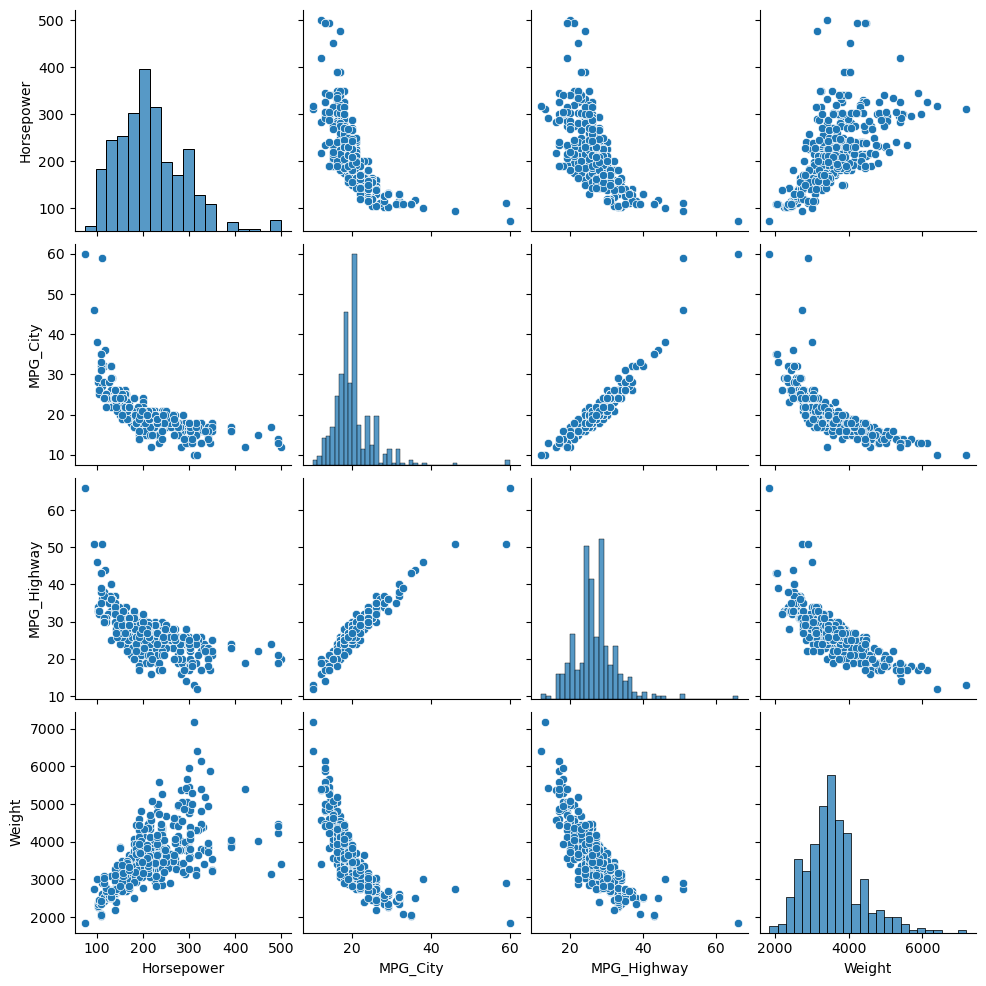

In [36]:
sns.pairplot(cars[['Horsepower', 'MPG_City', 'MPG_Highway', 'Weight']])
plt.show()


# _**scatterplot**_

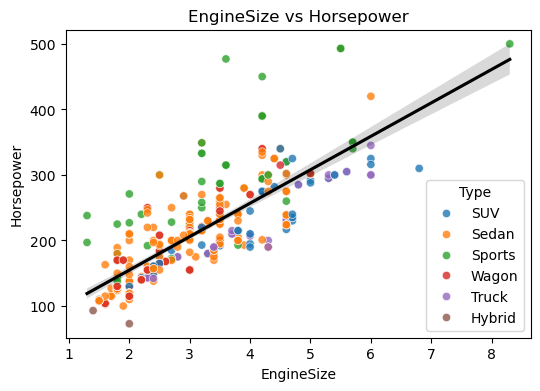

In [39]:

plt.figure(figsize=(6,4))
sns.scatterplot(x='EngineSize', y='Horsepower', hue='Type', data=cars, alpha=0.8)
sns.regplot(x='EngineSize', y='Horsepower', data=cars, scatter=False, color='black')
plt.title("EngineSize vs Horsepower")
plt.show()
